# Stochastic gradient descent


![](http://www.holehouse.org/mlclass/17_Large_Scale_Machine_Learning_files/Image%20[16].png)


Stochastic gradient descent (SGD) is an optimization method that can be applied to problems in which we seek to minimize the expected value of a :


$$
\text{argmin}_x \frac{1}{n} \sum_{i=1}^n f_i(x) \quad,
$$

This is ideally suited for machine learning problems, where $n$ is the number of samples.

## The algorithm

The algorithm is similar to gradient descent, with the key exception that instead of using the _full gradient_ we use the gradient of a random sample. At each iteration we choose $1 \leq i \leq n$ uniformly at random and perform the update:


$$
  x^{k+1} = x^k - \gamma^k \nabla f_i(x^k) \quad.
$$


## Example

Continuing with the least squares problem

In [2]:
import numpy as np
np.random.seed(0)

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = A.dot(w) + np.random.randn(n_samples)

def func(x):
    return 0.5 * np.sum((b - np.dot(A, x)) ** 2)

def grad(x):
    return - A.T.dot(b - np.dot(A, x))

def partial_grad(x, i):
    return - A[i] * (b[i] - np.dot(A[i], x))

In [3]:
# Implemented algorithm:

max_iter = 100
# Lipschitz constant
L = np.linalg.norm(A.T.dot(A))
step_size = 1. / L
# initial guess
xk = np.zeros(n_features)
for i in range(max_iter):
    idx = np.random.randint(0, n_samples) 
    xk = xk - step_size * partial_grad(xk, idx)

In [17]:
# imports matplotlib, a plotting library
%pylab inline

cost_history = []
grad_history = []
xk = np.zeros(n_features)
for i in range(max_iter * 100):
    idx = np.random.randint(0, n_samples) 
    xk = xk - (step_size / np.sqrt(i+1.0)) * partial_grad(xk, idx)
    cost_history.append(func(xk)) # .. insert this line to keep track of iterates ..
    grad_history.append(np.linalg.norm(grad(xk)))

Populating the interactive namespace from numpy and matplotlib


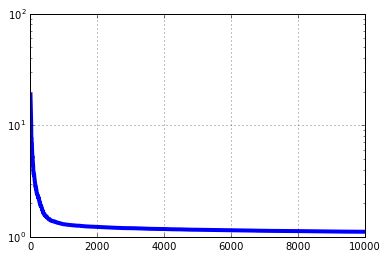

In [18]:
plt.plot(cost_history, lw=4)
plt.grid()
plt.yscale('log')
plt.show()

## Exercise

  * What is going on?
  * Why is it not converging?
  * How to solve this issue?